## BUSINESS PROBLEM

### DATA UNDERSTANDING

The columns available are:

Loan Id - Unique Identifer for each loan application

Gender - The Gender of the loan applicant

Married - Indicates whether the applicant is married or not.

Dependants - The number of dependants the applicant has

Education - The level of education of the applicant

Self-employed - Whether the applicant is self-employed or not

ApplicantIncome - The income of the applicant

CoapplicantIncome - Income of the coapplicant if any

LoanAmount - Amount of loan requested by the applicant

Loan_Amount_Term - The duration of the loan in months

Credit_History - Indicates the credit history of the applicant

Property_Area - The area where the property of the applicant is located

Loan_Status - Status of the loan application. Y(Yes) for approved and N(No) for not approved

In [92]:
!conda install statsmodels

^C


In [84]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
# Loading the data

data = pd.read_csv('train_dataset.csv')
data.head()

In [ ]:
# Creating a copy of the dataset

data2 = data.copy()
data2.head()


### We'll work with the copy of the data

In [ ]:
# Checking the shape of the data

data2.shape

Our data has 13 columns and 614 rows

In [ ]:
# Data info

data2.info()

## Observation

There are some missing values according to the information above

There are both numerical(float and integer)and categorical columns

### DATA CLEANING

In [ ]:
# Starting with Gender

data2['Gender'].value_counts()

In [ ]:
data2['Gender'].isna().sum()

In [ ]:
# Checking rows with missing values in the gender column

data2[data2['Gender'].isna()]

Filling missing values in the Gender column with missing or unknown as it is a categorical column

In [ ]:
data2['Gender'].fillna('Missing', inplace=True)

In [ ]:
data2.isna().sum()

In [ ]:
# Now gender has no missing values

In [ ]:
# Viewing rows with missing values in the Married Column

data2[data2['Married'].isna()]

In [ ]:
# Filling in the missing values of the Married column

data2.fillna({'Married': 'Unknown'},inplace=True)

In [ ]:
# Filling missing values of the dependents column 

data2.fillna({'Dependents':'Missing'},inplace=True)

In [ ]:
# Missing values in self employed column

In [ ]:
# Checking what values the self employed column contain

data2['Self_Employed'].value_counts()

In [ ]:
# Filling missing values in the Self Employed column

data2.fillna({'Self_Employed':'Unknown'},inplace=True)

In [ ]:
data2.isna().sum()

In [ ]:
# Loan Amount column

data2['LoanAmount'].dtype

In [85]:
data2['LoanAmount'].isna().sum()

22

In [86]:
# Checking missing values for the float column(Loan Amount)
data2[data2['LoanAmount'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,Unknown,6782,0.0,NaN,360.0,NaN,Urban,N
102,LP001350,Male,Yes,Missing,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


In [87]:
data2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<Axes: ylabel='LoanAmount'>

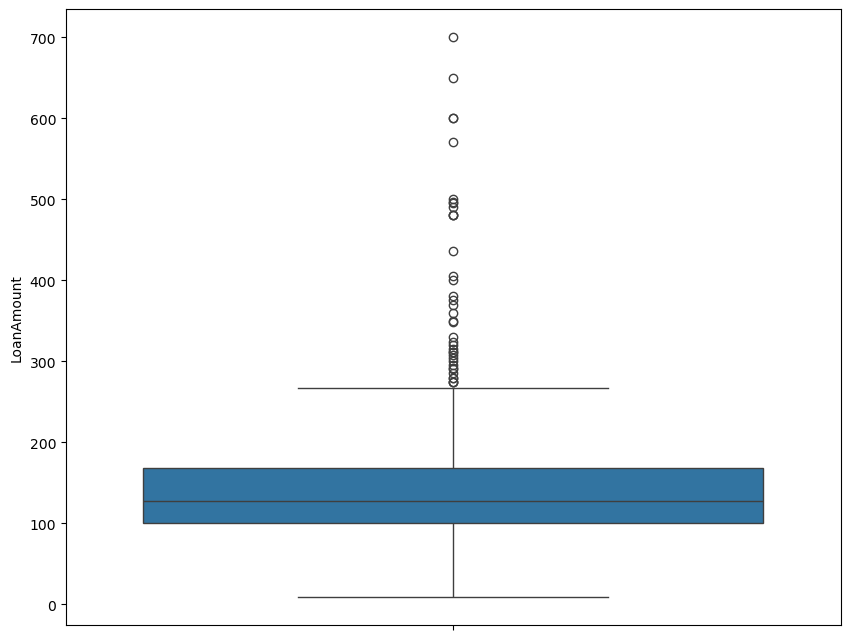

In [88]:
# Checking if the data is normally distributed and does not have outliers so as to impute Loan Amount with mean

plt.figure(figsize=(10,8))
sns.boxplot(data2['LoanAmount'])

For a shapiro wilk test that checks for normality, if the p-value is greater than 0.05(A larger p-value) then the data is normally distributed and if it is lower then the data is not normally distributed.

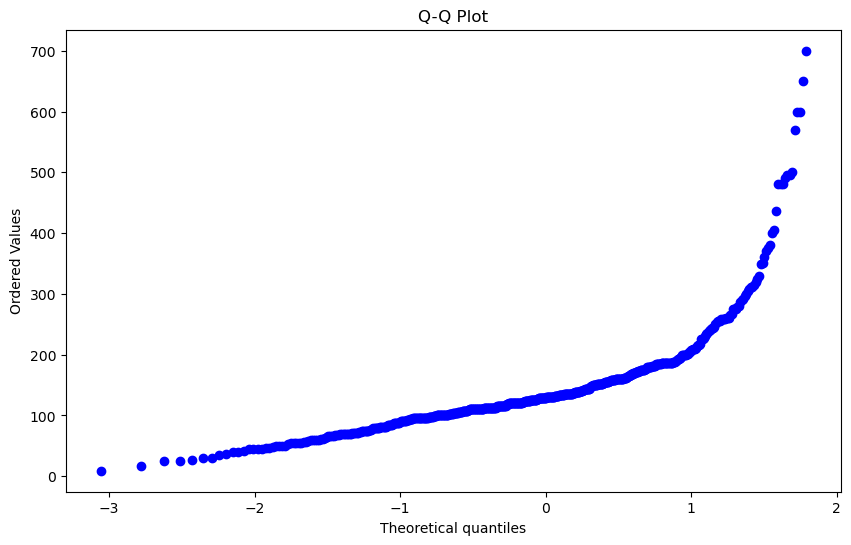

In [89]:
# Q-Q Plot

plt.figure(figsize=(10,6))
stats.probplot(data2['LoanAmount'],dist='norm',plot=plt)
plt.title('Q-Q Plot')
plt.show()

In [91]:
# Q-Q Plot
plt.figure(figsize=(10, 6))
sm.qqplot(data2,line='45')
plt.title('Q-Q Plot of Loan Amount')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


NameError: name 'sm' is not defined

<Figure size 1000x600 with 0 Axes>

In [77]:
# Performing shapiro wilk test to check if the data is normally distributed

shapiro_test = stats.shapiro(data2)
print(f"Shapiro Wilk Test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

Shapiro Wilk Test: Statistic=nan, p-value=nan
